In [56]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
from sklearn.cluster import KMeans
import numpy as np
import cv2 as cv
import urllib.request
import math

from matplotlib import pyplot as plt

In [57]:
!gdown --id '1gPUZ08zP32K4Zc041L0qGHBmVdCSlEuA' -O citra.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gPUZ08zP32K4Zc041L0qGHBmVdCSlEuA
To: /content/citra.jpg
100% 215k/215k [00:00<00:00, 51.9MB/s]


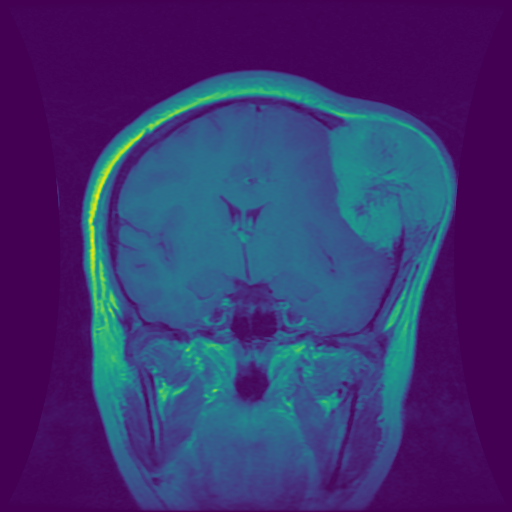

In [58]:
img = cv.imread('citra.jpg')
imshow(img)

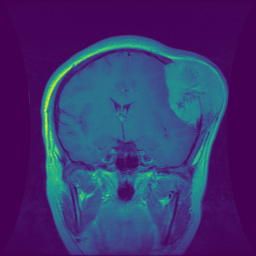

(256, 256, 3)

In [59]:
# resize

scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
imshow(img_resized)
img_resized.shape

red


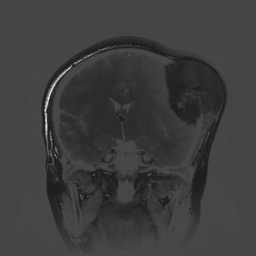

green


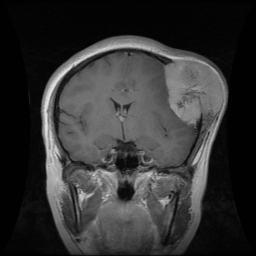

blue


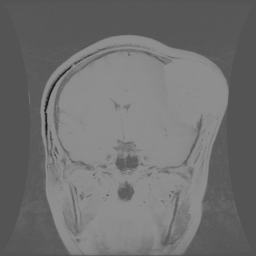

In [60]:
# color translation
img_r = img_resized[:,:,2]
img_g = img_resized[:,:,1]
img_b = img_resized[:,:,0]

print("red")
imshow(img_r)

print("green")
imshow(img_g)

print("blue")
imshow(img_b)

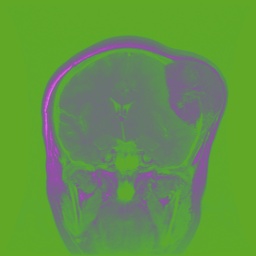

In [61]:
# color space translation to LAB / CIELAB

img_lab = cv.cvtColor(img_resized, cv.COLOR_BGR2Lab)
imshow(img_lab)

lightness


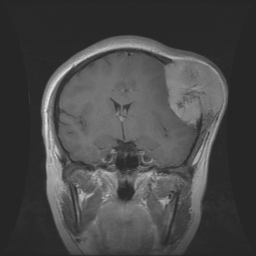

a (green to magenta)


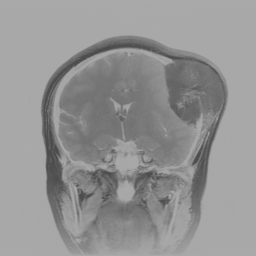

b (blue to yellow)


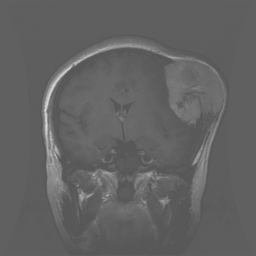

In [62]:
# color translation from lab

"""
L – Lightness ( Intensity ).
a – color component ranging from Green to Magenta.
b – color component ranging from Blue to Yellow.
"""

img_l = img_lab[:,:,0]
img_a = img_lab[:,:,1]
img_b = img_lab[:,:,2]

print("lightness")
imshow(img_l)

print("a (green to magenta)")
imshow(img_a)

print("b (blue to yellow)")
imshow(img_b)

[39112 19778  6646] [2 1 0] [127]
[51976  1873 11687] [1 2 0] [255]


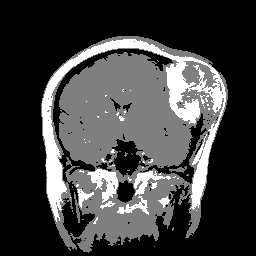

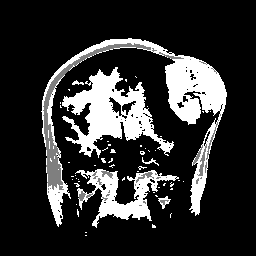

In [87]:
# k means

img1 = img_a
img2 = img_b

Z = img1.reshape((-1))
Z = np.float32(Z)

K = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,_=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)

Z = img2.reshape((-1))
Z = np.float32(Z)

ret2,label2,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)

# center = np.uint8(center)
# white, gray, black
center = np.array([[0], [127], [255]], dtype=np.uint8)
res = center[label.flatten()]
_, counts = np.unique(label, return_counts=True)
sorted_counts = np.argsort(counts)
segmented_part = center[sorted_counts[1]]
print(counts, sorted_counts, segmented_part)


res2 = center[label2.flatten()]
_, counts2 = np.unique(label2, return_counts=True)
sorted_counts2 = np.argsort(counts2)
segmented_part2 = center[sorted_counts2[1]]
print(counts2, sorted_counts2, segmented_part2)


result1 = res.reshape((img1.shape))
result2 = res2.reshape((img2.shape))

imshow(result1)
imshow(result2)

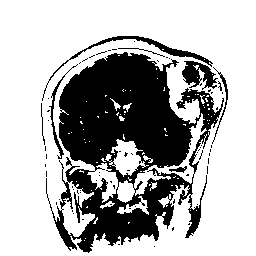

In [88]:
# segmented part

row, col = result1.shape

img_segmented = np.zeros((row, col), dtype=np.uint8)

for y in range(col):
  for x in range(row):
    if result1[y,x] != segmented_part:
      img_segmented[y,x] = 255
    else:
      img_segmented[y,x] = 0

imshow(img_segmented)

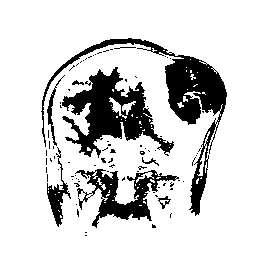

In [89]:
# segmented part

row, col = result2.shape

img_segmented2 = np.zeros((row, col), dtype=np.uint8)

for y in range(col):
  for x in range(row):
    if result2[y,x] != segmented_part2:
      img_segmented2[y,x] = 255
    else:
      img_segmented2[y,x] = 0

imshow(img_segmented2)

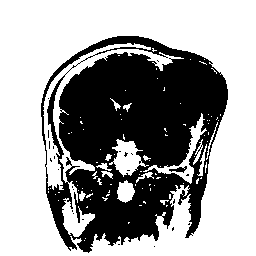

In [90]:
img_seg = cv.bitwise_and(img_segmented, img_segmented2)
imshow(img_seg)

76.0


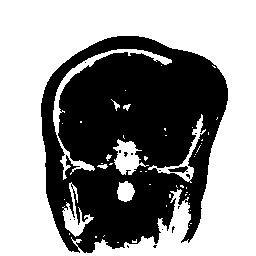

In [107]:
rect, img_th = cv.threshold(img_l,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(rect)
img_th = cv.bitwise_not(img_th)
imshow(img_th)

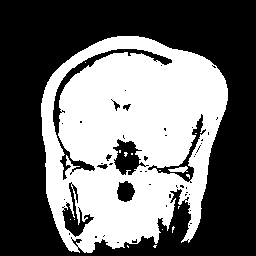

In [110]:
img_final = cv.bitwise_and(img_seg, img_th)
img_final = cv.bitwise_not(img_final)
imshow(img_final)

In [113]:
# img_final_f = cv.cvtColor(img_final, cv.COLOR_GRAY2BGR)
# img_final_f = cv.cvtColor(img_final_f, cv.COLOR_BGR2LAB)

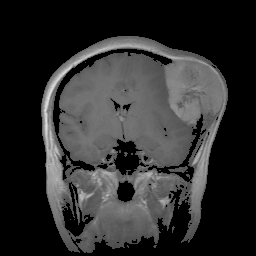

In [119]:
final = cv.bitwise_and(img_final, img_l)
imshow(final)